In [22]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [28]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
 
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = session.query(Measurement.tobs).filter(extract('month',Measurement.date) == 6).all()
print(results_june)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [6]:
#  3. Convert the June temperatures to a list.
temps = list(np.ravel(results_june))
print(temps)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_df = pd.DataFrame(temps, columns = ["June Temps"])
temps_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_december = session.query(Measurement.tobs).filter(extract('month',Measurement.date) == 12).all()
print(results_december)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [11]:
# 7. Convert the December temperatures to a list.
temps = list(np.ravel(results_december))
print(temps)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temps_df = pd.DataFrame(temps,columns=["Dec Temps"])
temps_df.head()

,Dec Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### The minimum temp in June is 56 F, which is lower than the minumum temp recorded in December 64 F.

### The maximum temp in June is slightly higher 85 F than the maximum temp recored in December 83 F.

### The average temp recored in June is 75 F, as compared to December 71 F.

## Extra Query for June and December

## Rainfall in June and December

### Rainfall in June 

In [27]:
rainfall_june = session.query(Measurement.prcp).filter(extract('month',Measurement.date) == 6).all()
for rainfall in rainfall_june:
    print(rainfall)

(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.07,)
(0.0,)
(0.56,)
(0.89,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.05,)
(0.06,)
(0.07,)
(None,)
(0.0,)
(0.0,)
(0.01,)
(0.01,)
(0.0,)
(0.02,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.15,)
(0.01,)
(0.0,)
(0.05,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.37,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.04,)
(0.12,)
(0.04,)
(0.02,)
(0.35,)
(0.03,)
(0.01,)
(0.0,)
(0.0,)
(0.03,)
(0.01,)
(0.0,)
(0.66,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.03,)
(0.15,)
(0.01,)
(0.07,)
(0.01,)

In [18]:
rainfall_june_df = pd.DataFrame(rainfall_june, columns = ["rainfall"])
rainfall_june_df.head()

,rainfall
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00


In [20]:
rainfall_june_df.describe()

,rainfall
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


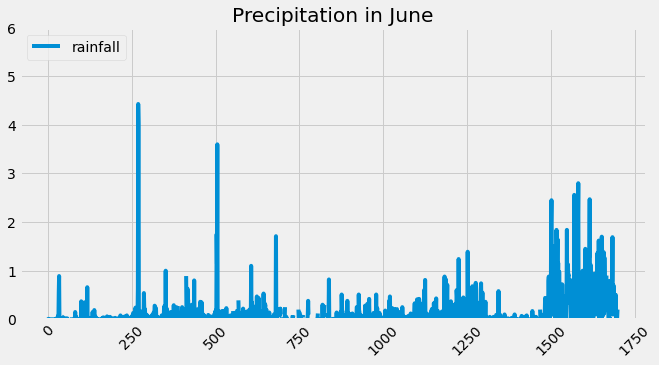

In [37]:
rainfall_june_df.plot(figsize=(10,5),ylim=(0,6),title='Precipitation in June',\
                  label="Precipitation",rot=45)
plt.legend(loc="upper left")

## Rainfall in December

In [25]:
rainfall_december = session.query(Measurement.prcp).filter(extract('month',Measurement.date) == 12).all()
for rainfall in rainfall_december:
    print(rainfall)

(0.04,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(1.58,)
(0.77,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(1.4,)
(0.0,)
(0.0,)
(None,)
(0.13,)
(0.55,)
(0.06,)
(0.01,)
(0.0,)
(0.03,)
(0.08,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.13,)
(0.07,)
(0.07,)
(0.08,)
(0.4,)
(0.7,)
(0.0,)
(0.01,)
(0.07,)
(0.02,)
(0.15,)
(0.02,)
(0.18,)
(0.03,)
(0.04,)
(0.1,)
(0.03,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.2,)
(0.01,)
(None,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.14,)
(0.09,)
(0.01,)
(0.02,)
(0.02,)
(0.12,)
(0.0,)
(0.1,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.04,)
(0.0,)
(2.01,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(1.1,)
(0.02,)
(0.0,)
(0.16,)
(0.09,)
(0.02,)
(0.0,)
(0.0,)
(0.05,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.15,)
(0.09,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.05,)
(0.01,)
(0.0,)
(0.03,)
(0.02,)
(0.01,)
(0.01,)
(0.0,)
(

In [29]:
rainfall_december_df = pd.DataFrame(rainfall_december, columns = ["rainfall"])
rainfall_december_df.head()

,rainfall
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00


In [30]:
rainfall_december_df.describe()

,rainfall
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


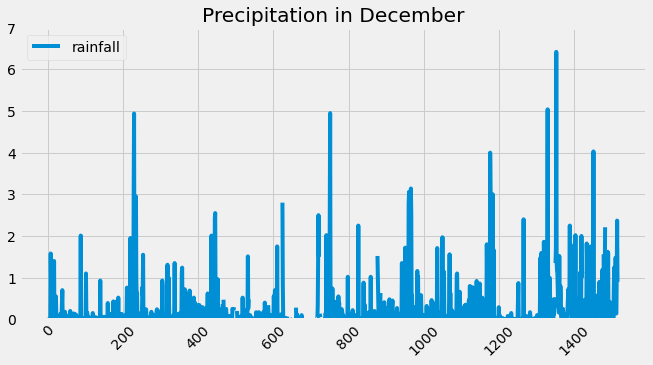

In [35]:
rainfall_december_df.plot(figsize=(10,5),ylim=(0,7),title='Precipitation in December',\
                  label="Precipitation",rot=45)
plt.legend(loc="upper left")

### There are more instances of rainfall in June (1574) as compared to December (1405).

### The amount of rainfall in December is higher with a mean of 0.22 as compared to June (mean = 0.14). 

### The maximum amount of rainfall is also recorded in December (6.4) as compared to June (4.43)

## End of Deliverable 3